# QUARTA SIMULAZIONE DI RICHARDS CON WHETGEO1D
    -Author: Niccolò Tubini, Concetta D'Amato and Riccardo Rigon
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
-----
This code allows to plot the output of WHETGEO 1D by reading the netDCF output file of your simulation.<br>

Per la quarta simulazione di Richards si è deciso di analizzare due tipi di precipitazione su una colonna di suolo a fondo <b>permeabile</b> di questa composizione:<br><ul> <li>loamy sand per $0 \leq z \leq -2m$;</li> <li>sand per $-2\leq z\leq -4m$;</li><li>clay per $-4\leq z\leq -6m$.</li></ul>
La falda è stata impostata a -6m.<br>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import matplotlib.style as style 
from matplotlib import rc
import xarray as xr
import datetime

####### Plot settings #######
nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.3,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)

project_path = os.path.dirname(os.getcwd())
project_path

'C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students'

## Import your NetCDF file

In [3]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\output')
os.listdir()

['.DS_Store',
 'Integrate PDE',
 'WHETGEO_1205_0000.nc',
 'WHETGEO_1205_2_0000.nc',
 'WHETGEO_1305_0000.nc',
 'WHETGEO_1305_es2_0000.nc',
 'WHETGEO_bomba01_0000.nc',
 'WHETGEO_bomba01_new_0000.nc',
 'WHETGEO_bomba02_0000.nc',
 'WHETGEO_bomba03_0000.nc',
 'WHETGEO_bomba04_0000.nc',
 'WHETGEO_doppiofrontizio_0000.nc',
 'WHETGEO_doppiofrontizio_1perm_0000.nc',
 'WHETGEO_doppiofrontizio_2perm_0000.nc',
 'WHETGEO_doppiofrontizio_3imp_0000.nc',
 'WHETGEO_doppiofrontizio_4perm_0000.nc',
 'WHETGEO_frontizio01_0000.nc',
 'WHETGEO_frontizio02_0000.nc',
 'WHETGEO_frontizio03_0000.nc',
 'WHETGEO_frontizio04_0000.nc']

In [4]:
file_name = 'WHETGEO_doppiofrontizio_4perm_0000.nc'

In [5]:
ds = xr.open_dataset(file_name,engine='scipy')
ds

<xarray.Dataset>
Dimensions:        (depth: 86, dualDepth: 86, time: 2208)
Coordinates:
  * depth          (depth) float64 -5.933 -5.8 -5.667 ... -0.075 -0.025 0.0
  * dualDepth      (dualDepth) float64 -6.0 -5.867 -5.733 ... -0.1 -0.05 0.0
  * time           (time) datetime64[ns] 2020-06-01 ... 2020-08-31T23:00:00
Data variables:
    psi            (time, depth) float64 ...
    psiIC          (depth) float64 ...
    T              (depth) float64 ...
    theta          (time, depth) float64 ...
    darcyVelocity  (time, dualDepth) float64 ...
    waterVolume    (time, depth) float64 ...
    error          (time) float64 ...
    topBC          (time) float64 ...
    bottomBC       (time) float64 ...
    runOff         (time) float64 ...
    controlVolume  (depth) float64 ...
Attributes:
    Description_of_the_problem:         grid:  data/Grid_NetCDF/Richards_coup...
    Top_boundary_condition:              
    Bottom_boundary_condition:           
    path_top_boundary_condition:     

## Precipitation Timeseries

In [6]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\data\\Timeseries')
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'All_0.csv',
 'All_0_2020.csv',
 'bomba_10mm.csv',
 'data.csv',
 'doppiofrontizio.csv',
 'frontizio_01mm.csv',
 'LAI_sin.csv',
 'Prec.csv',
 'Prec_out_13.csv',
 'Prec_out_5m.csv',
 'prova.csv',
 'save.csv',
 'save15.csv',
 'savees.csv']

In [7]:
file_name = 'doppiofrontizio.csv' 

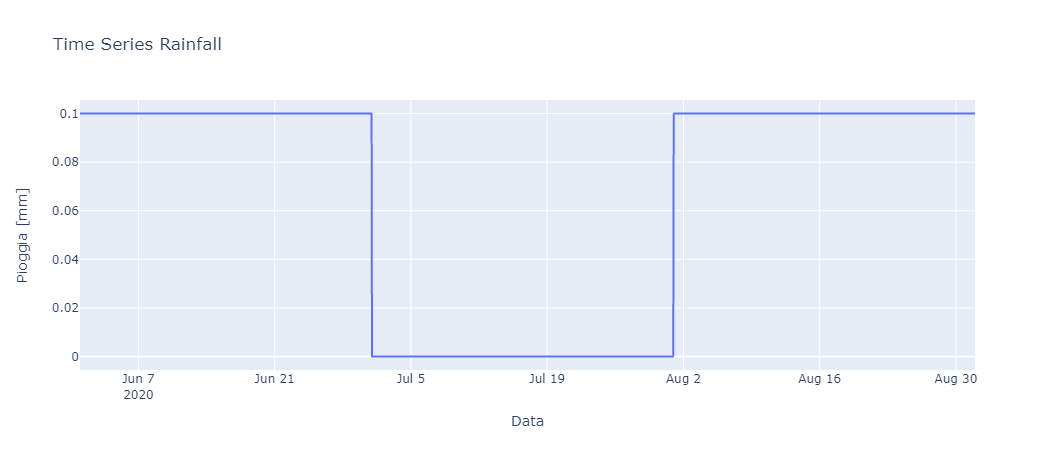

In [8]:
kl = pd.read_csv(file_name,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Data'
kl.columns.values[1] = 'Pioggia [mm]' 
fig = px.line(kl, x='Data', y='Pioggia [mm]', title='Time Series Rainfall')
fig.show()

## Plot water suction $\psi$

 ### Intial condition for water suction $\psi$

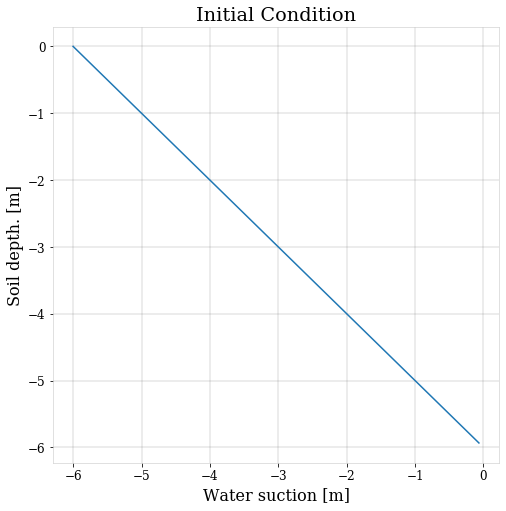

In [9]:
fig = plt.figure(figsize=(8,13/1.62))
ds.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]') 
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

 ### Water suction $\psi$ among the soil depth in your simulation  

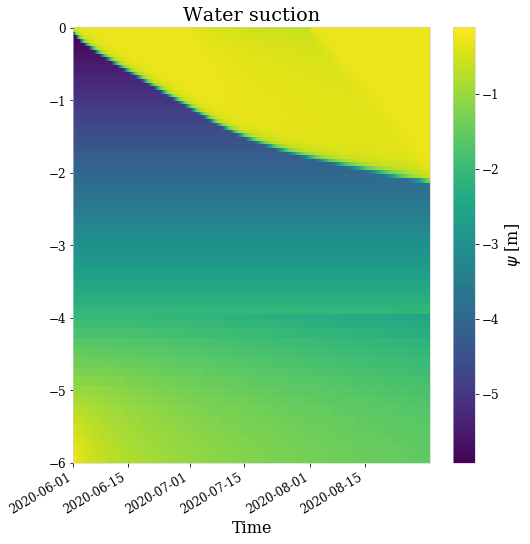

In [10]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')

Avendo impostato un fondo permeabile, la suzione con l'avanzare del tempo diminuisce perchè avviene infiltrazione di acqua.

## Plot water content  $\theta$

 ### Water content $\theta$ among the soil depth in your simulation  

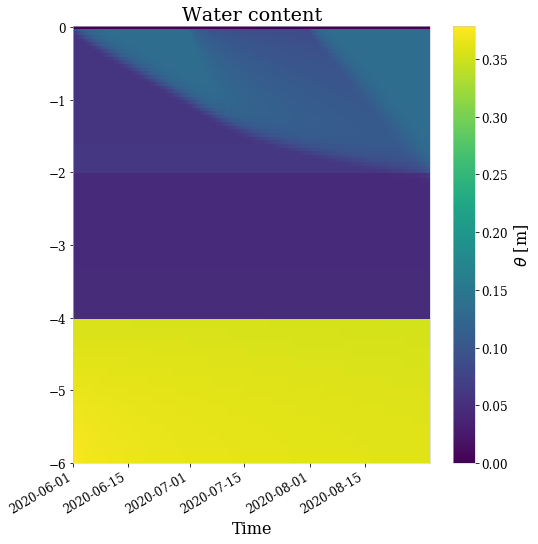

In [11]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')


### Plot specifical depth
Define a vector of depth 'myDepth' you would plot 

In [12]:
myDepth = [-0.1,-2,-4,-6]

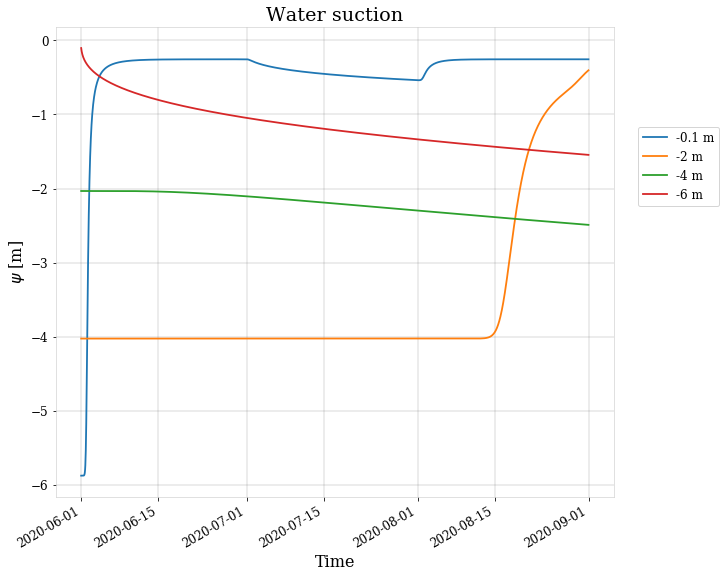

In [13]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.psi.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\psi$ [m]')
plt.xlabel('Time')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In linea con il grafico precedente, la $\psi$ negli strati più profondi si mantiene costante (la condizione resta quella idrostatica) mentre negli strati più superficiali varia con l'andamento delle precipitazioni.

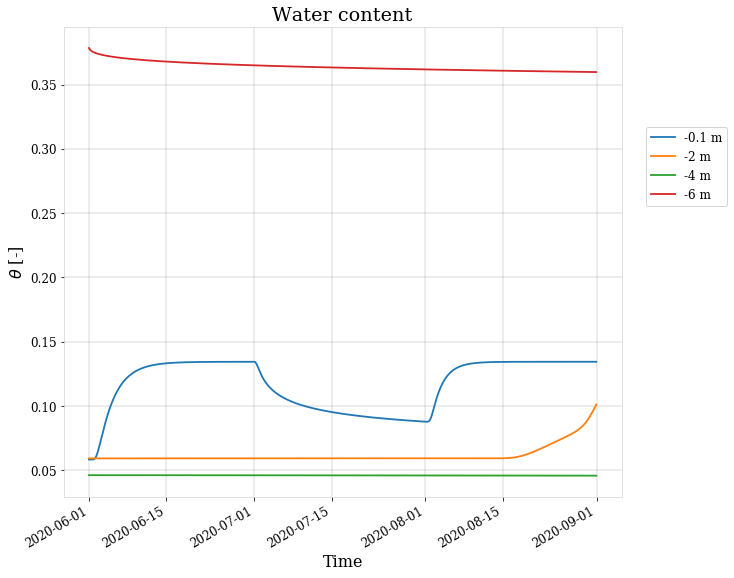

In [14]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDepth)):
    ds.theta.where(ds.depth<0).sel(depth=myDepth[i], method='nearest', time=ds.time.values[:]).plot(linewidth=1.8, label=str(myDepth[i])+' m')
plt.ylabel('$\\theta$ [-]')
plt.xlabel('Time')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.2,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

In linea con i precedenti grafici si nota come a -6m il $\theta$ diminuisce nel tempo a causa del passaggio di acqua interstiziale attraverso il fondo <b>permeabile</b>.

### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [15]:
myDate = ['2020-06-01 00:00:00','2020-06-30 00:00:00','2020-08-01 00:00:00','2020-08-31 00:00:00']

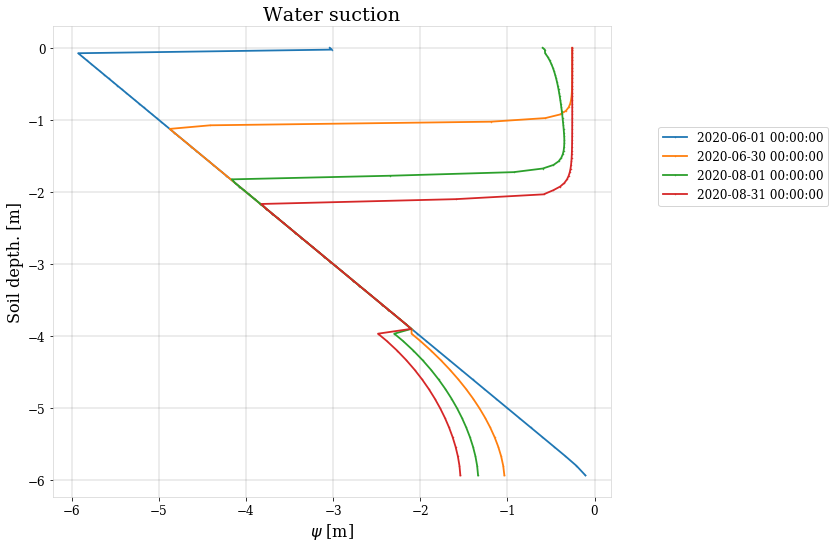

In [16]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.psi.sel(time=myDate[i],).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

Il fondo permeabile rende possibile il passaggio di acqua attraverso il limite inferiore del volume di controllo di conseguenza si registra una diminuzione di $\psi$ data dall'infiltrazione in corrispondenza dei -6m.
<br> Nel layer della sabbia $-2m\leq z \leq -4m$ si riscontrano variazioni di suzione solo alle due interfacce con gli altri layer, mentre nel mezzo no, perchè il processo di infiltrazione avviene così velocemente da far risultare il terreno perennemente in condizioni idrostatiche.

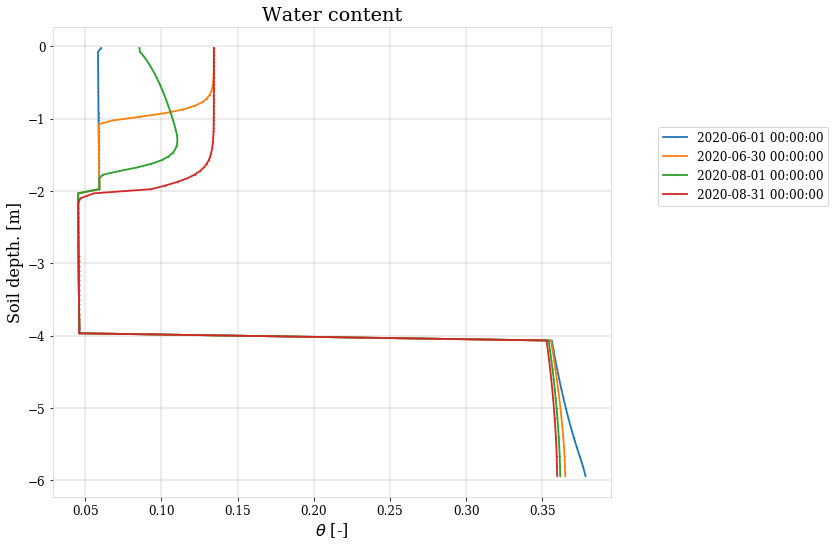

In [17]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds.theta.sel(time=myDate[i],depth=ds.depth.values[0:len(ds.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot top-bottom flux 

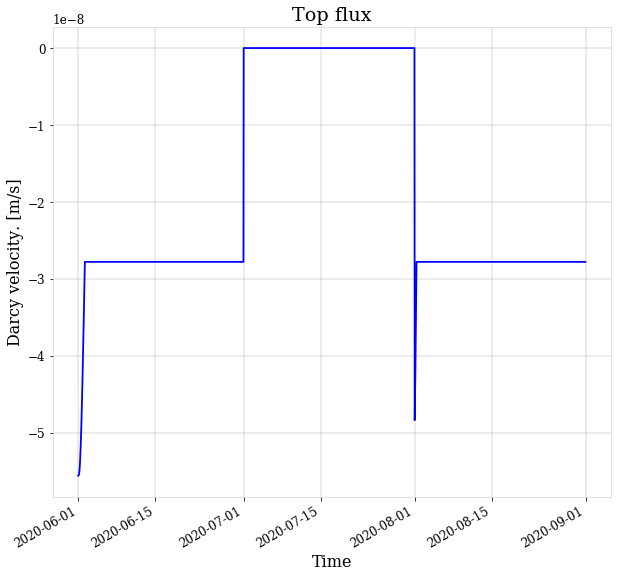

In [37]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[len(ds.dualDepth)-1], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

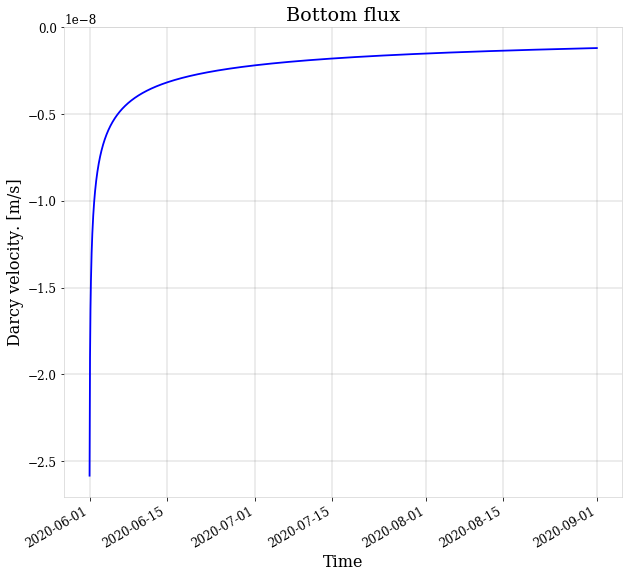

In [19]:
fig = plt.figure(figsize=(10,14/1.618))
ds.darcyVelocity.sel(dualDepth=ds.dualDepth[0], time=ds.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot Error 

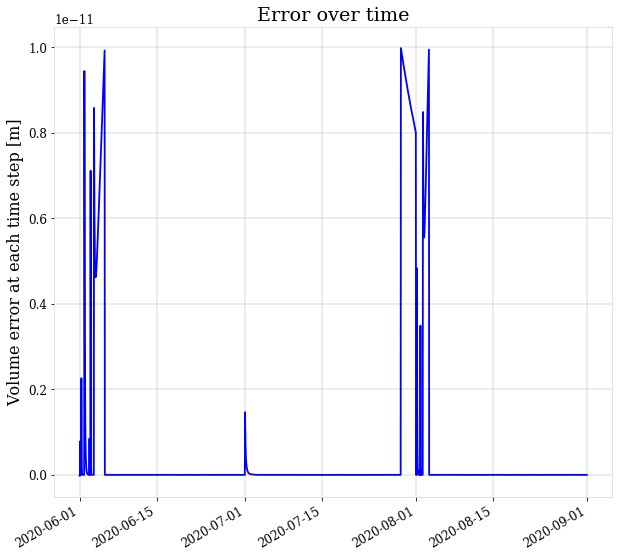

In [20]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds.error.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Import your NetCDF file

In [21]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\output')
os.listdir()

['.DS_Store',
 'Integrate PDE',
 'WHETGEO_1205_0000.nc',
 'WHETGEO_1205_2_0000.nc',
 'WHETGEO_1305_0000.nc',
 'WHETGEO_1305_es2_0000.nc',
 'WHETGEO_bomba01_0000.nc',
 'WHETGEO_bomba01_new_0000.nc',
 'WHETGEO_bomba02_0000.nc',
 'WHETGEO_bomba03_0000.nc',
 'WHETGEO_bomba04_0000.nc',
 'WHETGEO_doppiofrontizio_0000.nc',
 'WHETGEO_doppiofrontizio_1perm_0000.nc',
 'WHETGEO_doppiofrontizio_2perm_0000.nc',
 'WHETGEO_doppiofrontizio_3imp_0000.nc',
 'WHETGEO_doppiofrontizio_4perm_0000.nc',
 'WHETGEO_frontizio01_0000.nc',
 'WHETGEO_frontizio02_0000.nc',
 'WHETGEO_frontizio03_0000.nc',
 'WHETGEO_frontizio04_0000.nc']

In [22]:
file_name = 'WHETGEO_bomba04_0000.nc'

In [23]:
ds1 = xr.open_dataset(file_name,engine='scipy')
ds1

<xarray.Dataset>
Dimensions:        (depth: 86, dualDepth: 86, time: 697)
Coordinates:
  * depth          (depth) float64 -5.933 -5.8 -5.667 ... -0.075 -0.025 0.0
  * dualDepth      (dualDepth) float64 -6.0 -5.867 -5.733 ... -0.1 -0.05 0.0
  * time           (time) datetime64[ns] 2020-06-01 ... 2020-06-30
Data variables:
    psi            (time, depth) float64 ...
    psiIC          (depth) float64 ...
    T              (depth) float64 ...
    theta          (time, depth) float64 ...
    darcyVelocity  (time, dualDepth) float64 ...
    waterVolume    (time, depth) float64 ...
    error          (time) float64 ...
    topBC          (time) float64 ...
    bottomBC       (time) float64 ...
    runOff         (time) float64 ...
    controlVolume  (depth) float64 ...
Attributes:
    Description_of_the_problem:         grid:  data/Grid_NetCDF/Richards_coup...
    Top_boundary_condition:              
    Bottom_boundary_condition:           
    path_top_boundary_condition:         
    p

## Precipitation Timeseries

In [24]:
os.chdir('C:\\Users\\Manuela\\Desktop\\UNI\\IDROLOGIA\\OMS\\OMS_Project_WHETGEO1D-students\\OMS_Project_WHETGEO1D-students\\data\\Timeseries')
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'All_0.csv',
 'All_0_2020.csv',
 'bomba_10mm.csv',
 'data.csv',
 'doppiofrontizio.csv',
 'frontizio_01mm.csv',
 'LAI_sin.csv',
 'Prec.csv',
 'Prec_out_13.csv',
 'Prec_out_5m.csv',
 'prova.csv',
 'save.csv',
 'save15.csv',
 'savees.csv']

In [25]:
file_name = 'bomba_10mm.csv' 

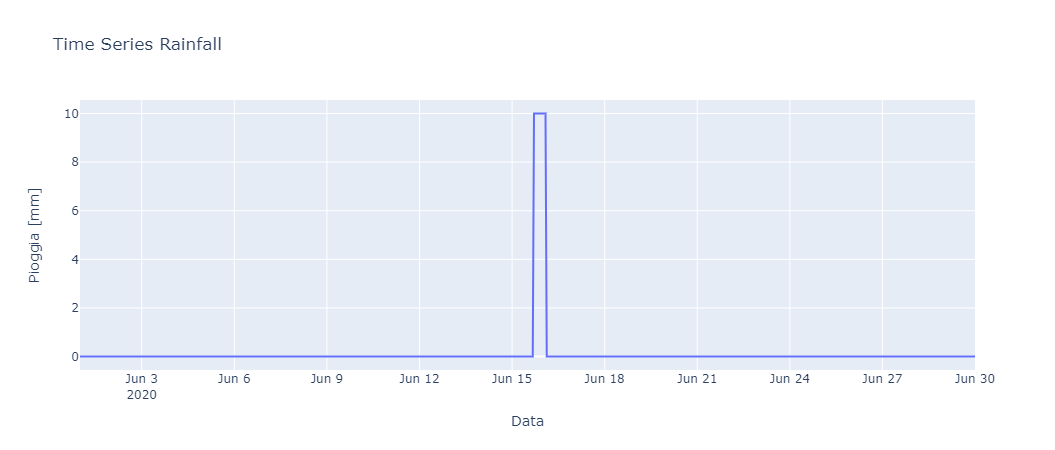

In [26]:
kl = pd.read_csv(file_name,skiprows=6,parse_dates=[1])
kl = kl.drop(['Format'],axis=1) 
kl.columns.values[0] = 'Data'
kl.columns.values[1] = 'Pioggia [mm]' 
fig = px.line(kl, x='Data', y='Pioggia [mm]', title='Time Series Rainfall')
fig.show()

## Plot water suction $\psi$

 ### Intial condition for water suction $\psi$

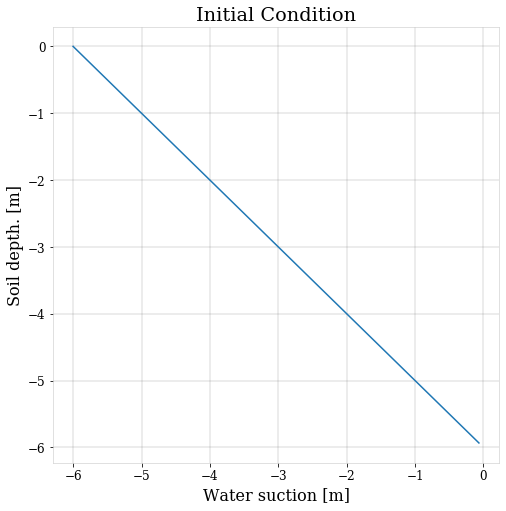

In [27]:
fig = plt.figure(figsize=(8,13/1.62))
ds1.psiIC.plot(y='depth')
plt.xlabel('Water suction [m]') 
plt.title('Initial Condition')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

 ### Water suction $\psi$ among the soil depth in your simulation  

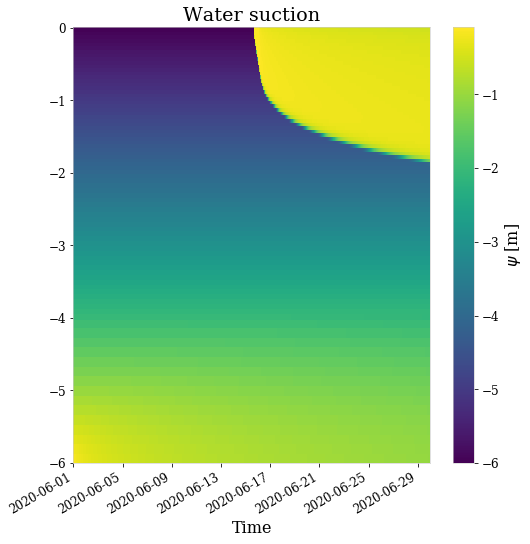

In [28]:
fig = plt.figure(figsize=(8,13/1.62))
ax = ds1.psi.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water suction')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\psi$ [m]')

## Plot water content  $\theta$

 ### Water content $\theta$ among the soil depth in your simulation

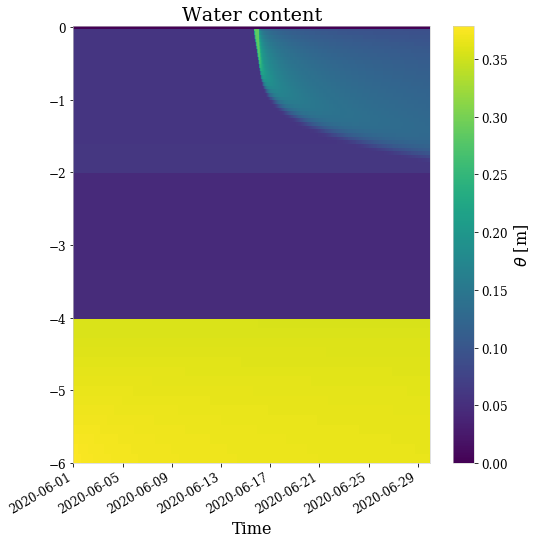

In [29]:
fig = plt.figure(figsize=(8,13/1.618))
ax = ds1.theta.plot(y='depth', cmap='viridis',add_colorbar=False)
plt.xlabel('Time')
plt.ylabel('')
plt.title('Water content')
cb = plt.colorbar(ax, orientation="vertical",pad=0.05) # horizontal
cb.set_label(label='$\\theta$ [m]')


### Plot specifical date
Define a vector of date 'myDate' you would plot 

In [38]:
myDate = ['2020-06-01 00:00:00','2020-06-15 17:00:00','2020-06-16 04:00:00','2020-06-30 00:00:00']

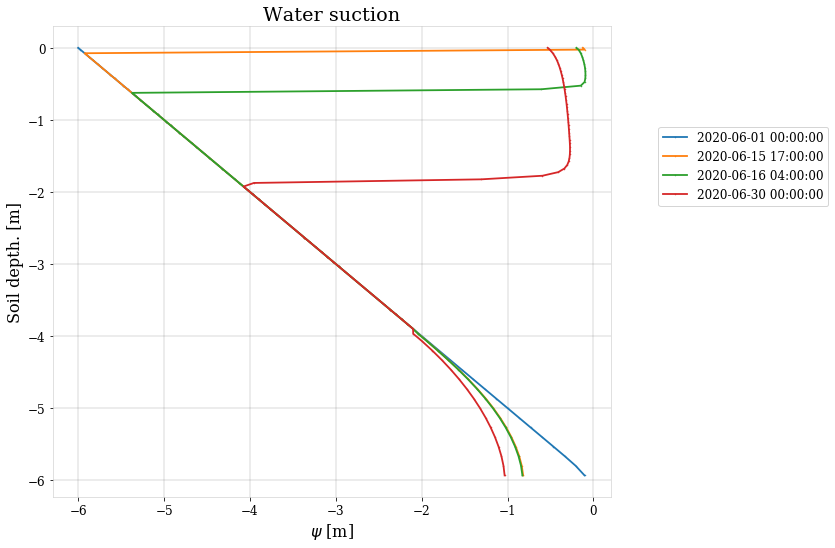

In [41]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds1.psi.sel(time=myDate[i],).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\psi$ [m]')
plt.title('Water suction')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

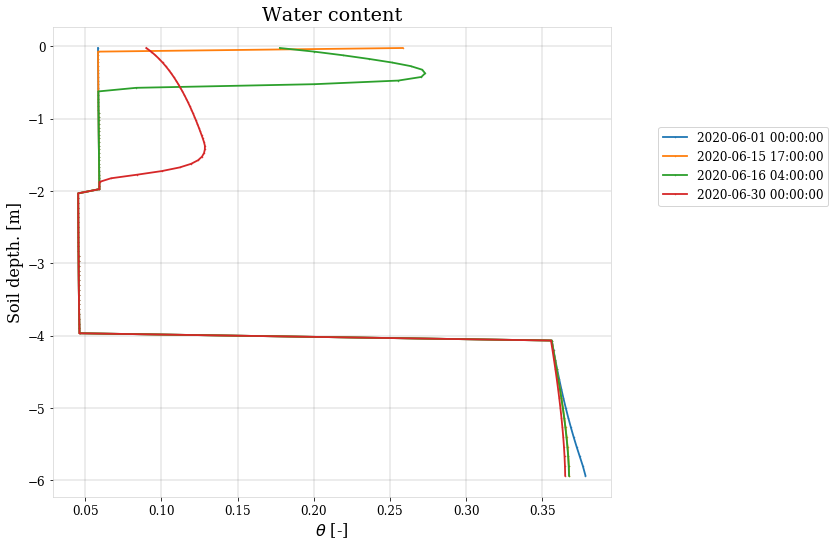

In [42]:
fig = plt.figure(figsize=(10,14/1.618))
for i in range (0,len(myDate)):
    ds1.theta.sel(time=myDate[i],depth=ds1.depth.values[0:len(ds1.depth)-1]).plot(y='depth', linewidth=1.8,marker='.',markersize=1, label=myDate[i])
plt.xlabel('$\\theta$ [-]')
plt.title('Water content')
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot top-bottom flux 

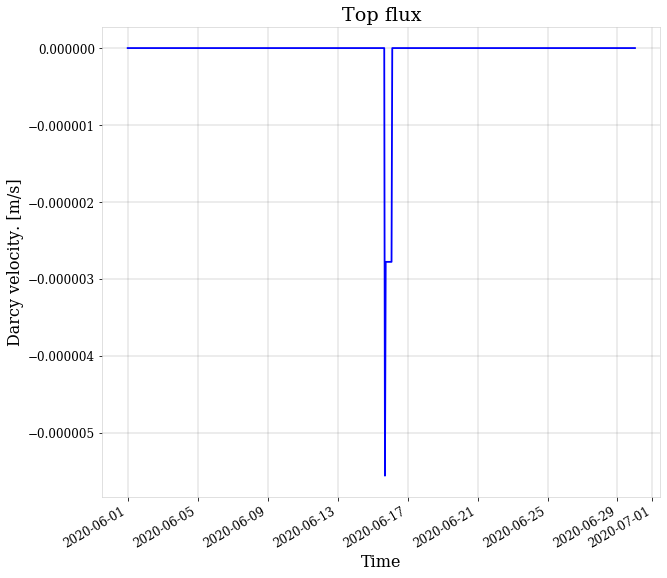

In [47]:
fig = plt.figure(figsize=(10,14/1.618))
ds1.darcyVelocity.sel(dualDepth=ds1.dualDepth[len(ds.dualDepth)-1], time=ds1.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

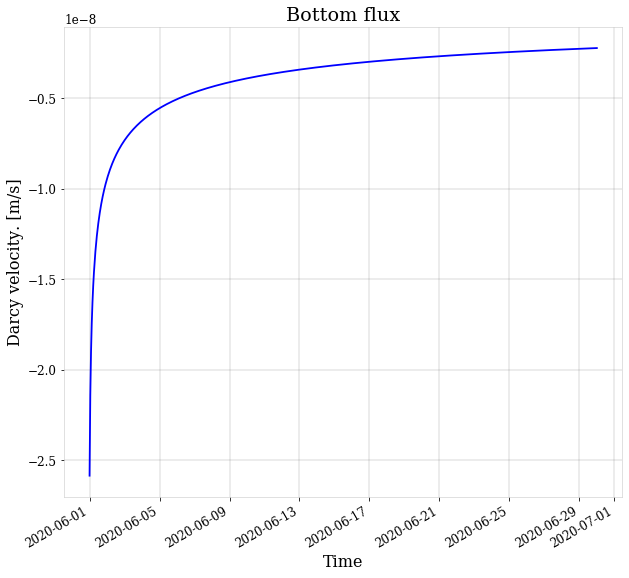

In [45]:
fig = plt.figure(figsize=(10,14/1.618))
ds1.darcyVelocity.sel(dualDepth=ds1.dualDepth[0], time=ds1.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Bottom flux')
plt.xlabel('Time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)

## Plot Error 

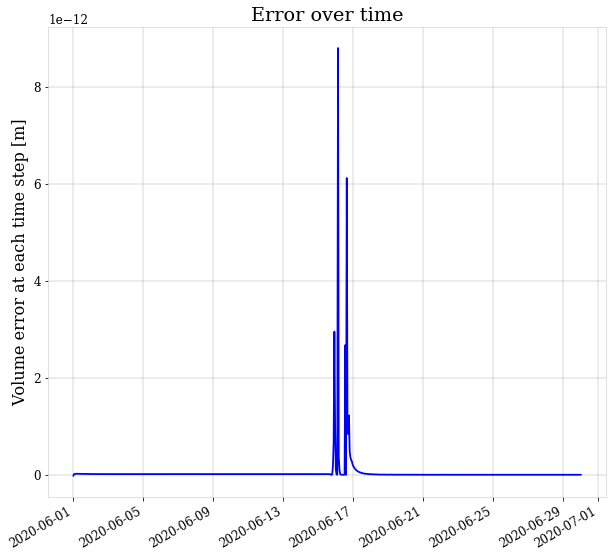

In [46]:
fig = plt.figure(figsize=(10,14/1.618))
ax = ds1.error.plot(linewidth=1.8, color='blue')
plt.xlabel('')
plt.ylabel('Volume error at each time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.3)## Plot Error 